In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

import pandas as pd
df = pd.read_csv("../data/train.csv")
df = df.drop(columns=['Id'])
print(df.dtypes.to_string())

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


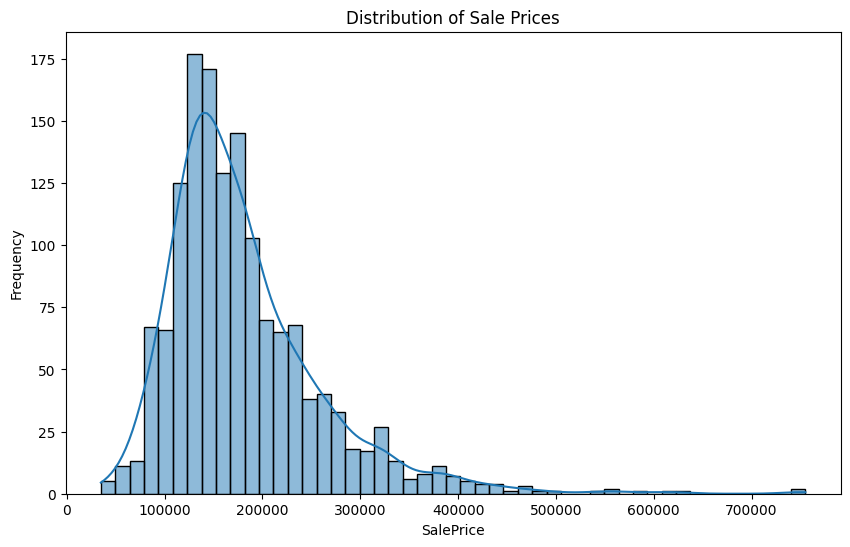

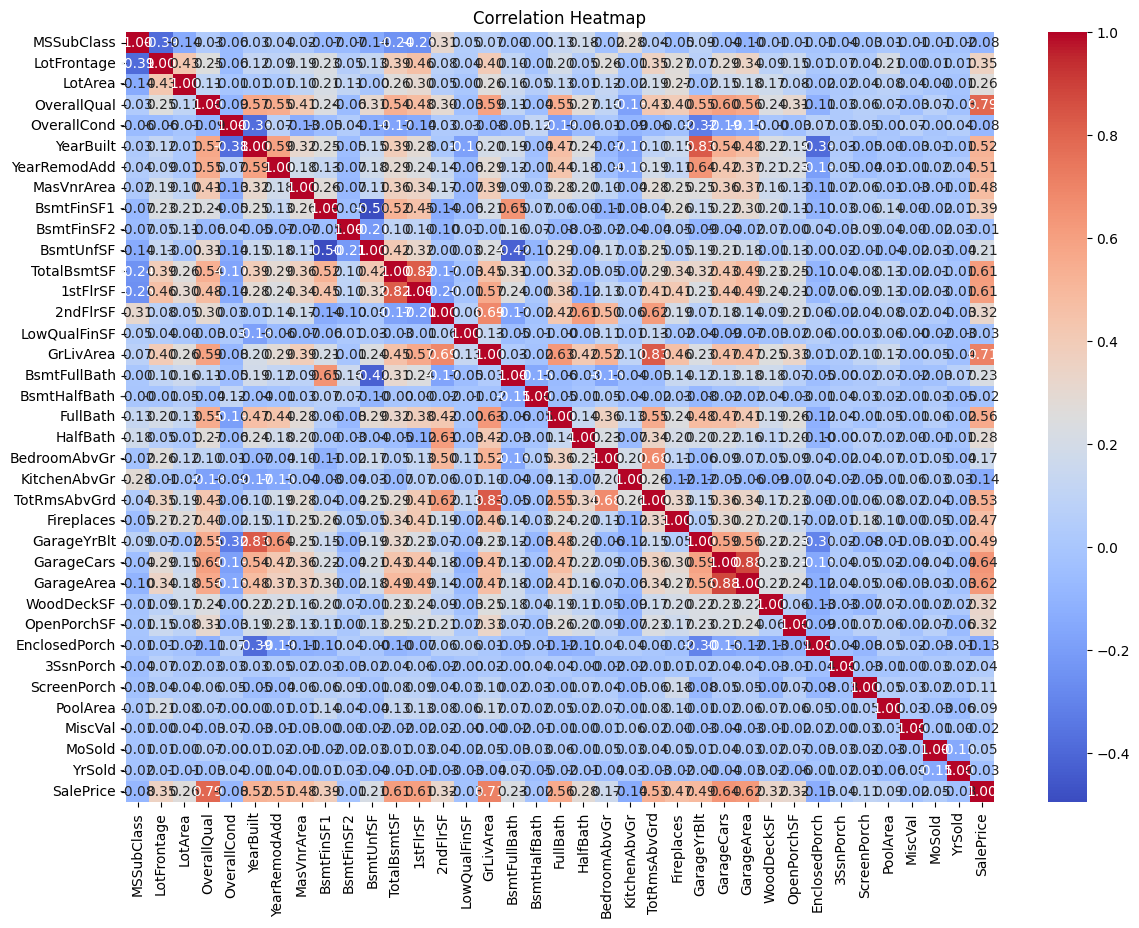

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  SalePrice
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   0.027850      0.040581    0.022936   -0.069836   -0.065649  -0.140759    -0.238518 -0.251758  0.307886      0.046474   0.074853      0.003491     -0.002333  0.131608  0.177354     -0.023438      0.281721      0.040380   -0.045569     0.085072   -0.040110   -0.098672   -0.012579    -0.006100      -0.012037  -0.043825    -0.026030  0.008283 -0.007683 -0.013585 -0.021407  -0.084284
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   0.123

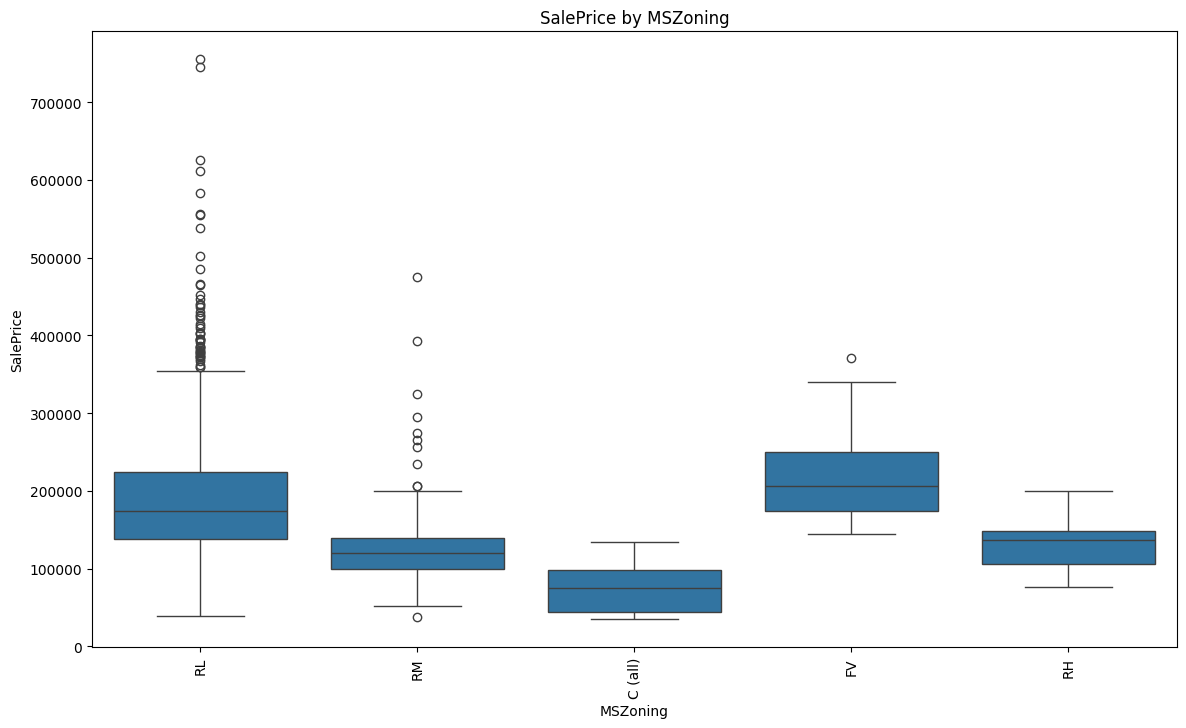

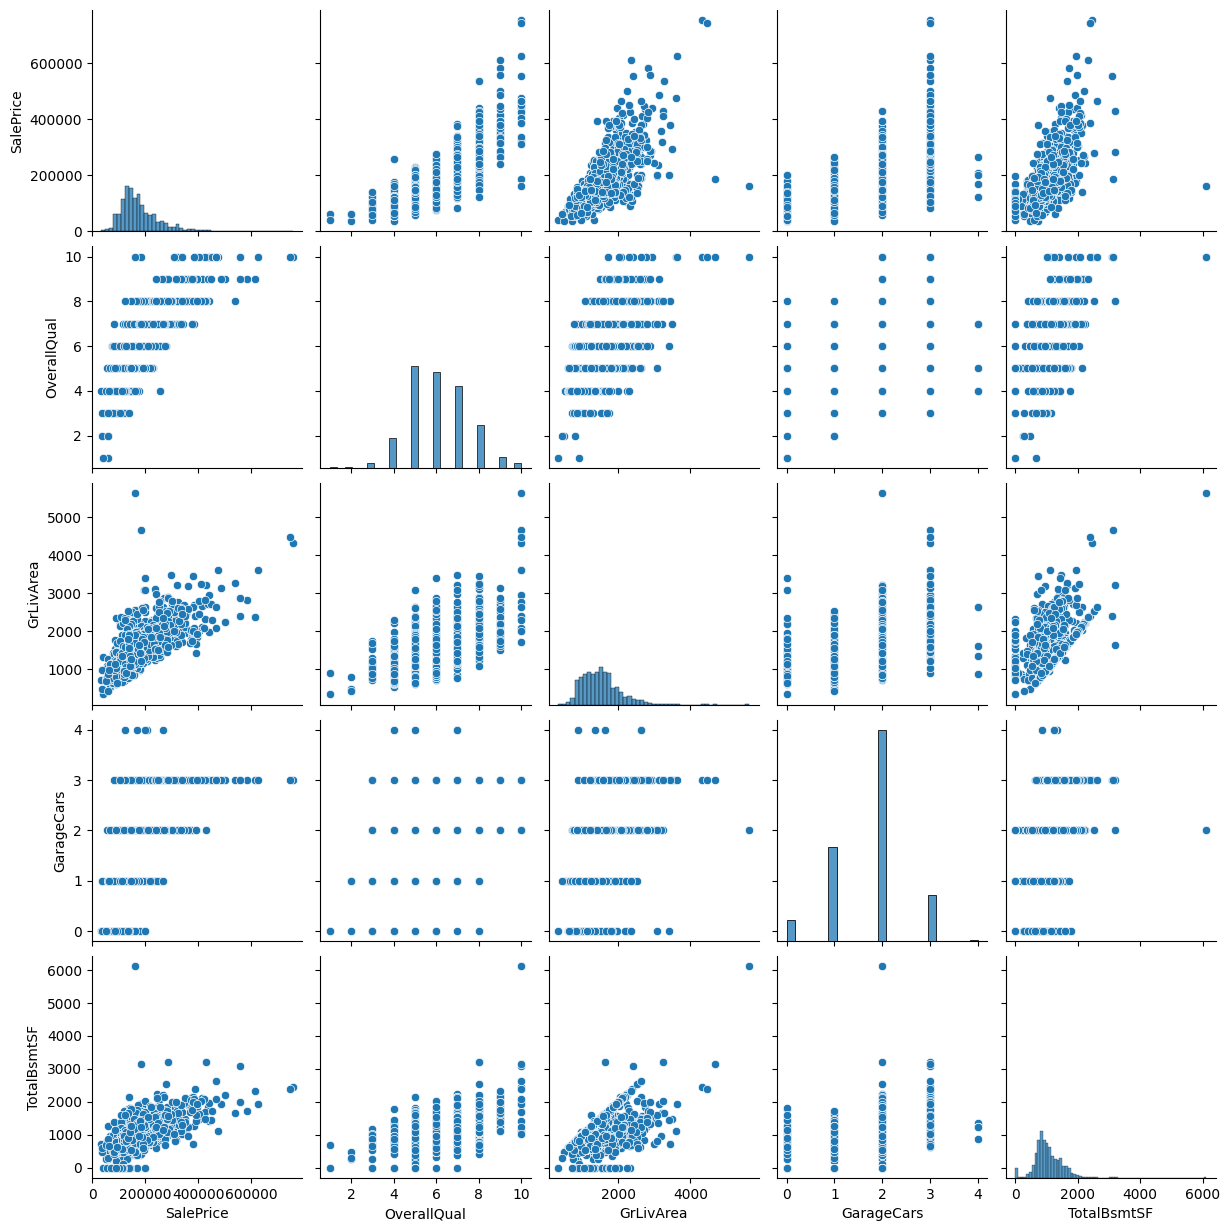

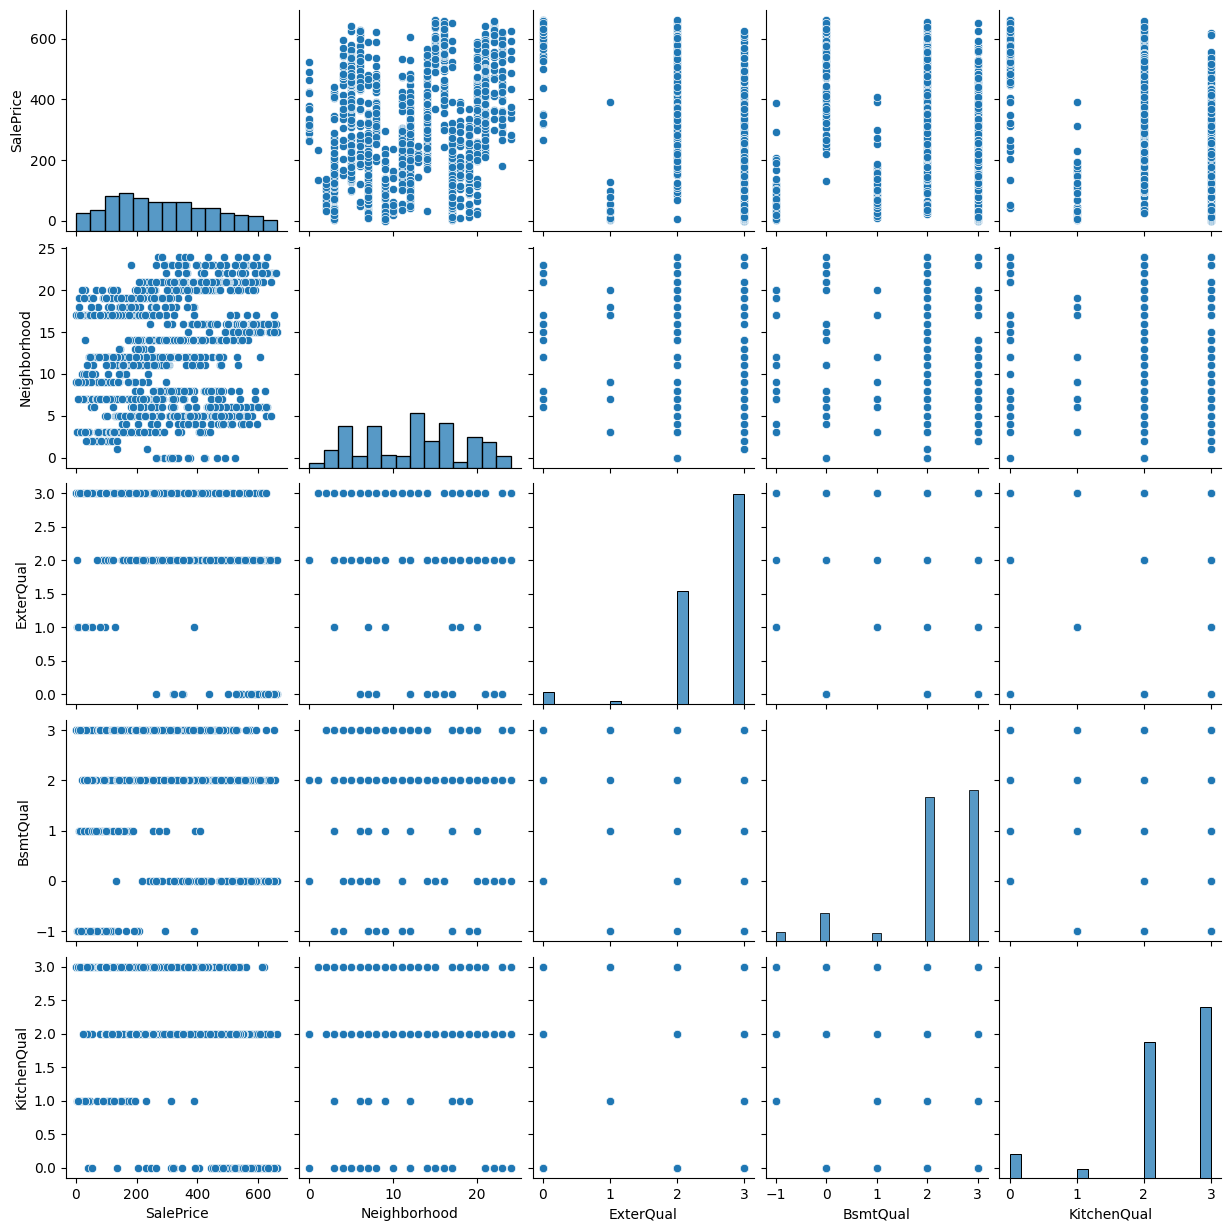

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Distribution of Sale Prices based on frequency of occurence
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# 2. Correlation Heatmap to see how features are correlated with each other
plt.figure(figsize=(14, 10))
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Bigger values mean higher correlation and higer correlation means one feature can be predicted by the other
# Lower correlation means the features are independent of each other
# So, we can drop one of the features if they are highly correlated, meaning their correlation value is higher
# than a certain threshold, say 0.8 or 0.9

# Extra: Correlation values table of every feature against every other feature as csv file
# To better analyze the correlation values
correlation_matrix.to_csv('../data/correlation_matrix.csv')

# 3. Boxplot of SalePrice by Neighborhood, 
# just change the column name(Neighborhood) to the one you want to plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='MSZoning', y='SalePrice', data=df)
plt.xticks(rotation=90)
plt.title('SalePrice by MSZoning')
plt.xlabel('MSZoning')
plt.ylabel('SalePrice')
plt.show()

# 4. Pairplot of selected numerical features, male sure they are numerical
# Change the column names to the ones you want to plot, make sure they are numerical
selected_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(df[selected_features])
plt.show()

# 5. Pairplot of selected categorical features encoded as numerical
# Change the column names to the ones you want to plot, make sure they are categorical
selected_features = ['SalePrice', 'Neighborhood', 'ExterQual', 'BsmtQual', 'KitchenQual'] 
for feature in selected_features:
    df[feature] = df[feature].astype('category').cat.codes

sns.pairplot(df[selected_features])
plt.show()